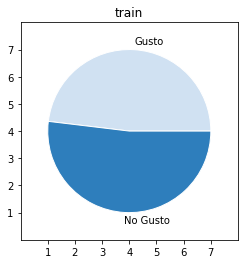

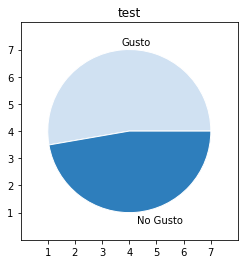

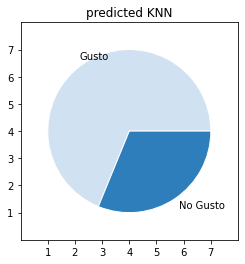

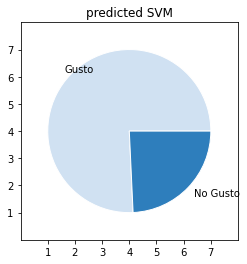

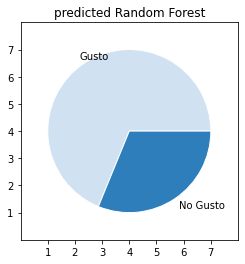

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# leemos el dataset
attributes_spotify = pd.read_csv(
    "https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")

# eliminamos columnas que no se utilizaran
attributes_spotify.drop('Unnamed: 0', inplace=True, axis=1)
attributes_spotify.drop('song_title', inplace=True, axis=1)
attributes_spotify.drop('artist', inplace=True, axis=1)

# modelos a comparar
names = [
    "KNN",
    "SVM",
    "Random Forest"
]

models = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]

# porcentajes para el train-validation-test
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

# split del dataset para entrenar
x_train, x_test, y_train, y_test = train_test_split(
    attributes_spotify, attributes_spotify.target, test_size=1-train_ratio)

# split del dataset para validar
x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

# contadores de cuantas canciones gustaron/no gustaron en cada subset
train_count = [0, 0]
test_count = [0, 0]
predicted_count = [0, 0]

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(train_count)))

# separo la cantidad de canciones que gustaron/no gustaron en los datos de entrenamiento
for val in y_train:
    if(val == 1):
        train_count[0] += 1
    else:
        train_count[1] += 1

# visualizacion de datos de entrenamiento
fig, ax = plt.subplots()

ax.pie(train_count, colors=colors, radius=3, center=(4, 4), labels=['Gusto', 'No Gusto'],
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax.set_title("train")

# separo la cantidad de canciones que gustaron/no gustaron en los datos de test
for val in y_test:
    if(val == 1):
        test_count[0] += 1
    else:
        test_count[1] += 1

# visualizacion de datos de test
fig, ax = plt.subplots()

ax.pie(test_count, colors=colors, radius=3, center=(4, 4), labels=['Gusto', 'No Gusto'],
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax.set_title("test")

# ejecucion de los modelos
for name, model in zip(names, models):
    model.fit(x_val, y_val)
    predicted = model.predict(x_test)

    # separo la cantidad de canciones que gustaron/no gustaron en los datos prediccion
    for val in predicted:
        if(val == 1):
            predicted_count[0] += 1
        else:
            predicted_count[1] += 1

    # visualizacion de datos de prediccion
    fig, ax = plt.subplots()

    ax.pie(predicted_count, colors=colors, radius=3, center=(4, 4), labels=['Gusto', 'No Gusto'],
           wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))

    ax.set_title("predicted " + name)


plt.show()
